In [1]:
%matplotlib inline

In [2]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import the statsmodels API
import statsmodels.api as sm

# Import the statsmodels formula API
import statsmodels.formula.api as smf

# Styling
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

c:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('2018-data/phil.csv')

# Add the temperature data into the DataFrame
for i in ['2018-data/feb', '2018-data/mar', '2018-data/apr', '2018-data/febmar', '2018-data/marapr', '2018-data/febmarapr']:
    temp = pd.read_csv('%s.csv' % i)
    temp['year'] = temp['Date'].astype(str).str.slice(0,4).astype(int)
    m = i.split('/')[1]
    temp[m] = temp['Value']
    df = df.merge(temp[['year', m]], on='year')
    #temp.head()
    
# Create an offset for the year, so 1898 is 0, 1899 is 1 and so on
df['year_offset'] = df['year'] - df['year'].min() + 1

# Take out the effect of global warming and the baseline temperature, so we're just left with an offset from 0.
# Negative numbers mean it's colder than average, positive means it's warmer.
for i in ['feb', 'mar', 'apr', 'febmar', 'marapr', 'febmarapr']:
    cycle, trend = sm.tsa.filters.hpfilter(df['%s' % i], lamb = 100000)
    df['%s_offset' % i] = cycle
    
    # Assign a class. 1 = 6 more weeks of winter, 2 = early spring
    df['%s_class' % i] = 1
    df.loc[df['%s_offset' % i] > 0, '%s_class' % i] = 2
    
df.head()

,year,result,feb,mar,apr,febmar,marapr,febmarapr,year_offset,feb_offset,...,mar_offset,mar_class,apr_offset,apr_class,febmar_offset,febmar_class,marapr_offset,marapr_class,febmarapr_offset,febmarapr_class
0,1895,No Record,26.60,39.97,52.90,33.28,46.44,39.82,1,-4.625505,...,-0.960014,1,2.008428,2,-2.797517,1,0.528171,2,-1.195750,1
1,1896,No Record,35.04,38.03,52.34,36.54,45.18,41.80,2,3.745583,...,-2.909794,1,1.450359,2,0.423169,2,-0.735723,1,0.758651,2
2,1897,No Record,33.39,38.79,51.15,36.09,44.97,41.11,3,2.026717,...,-2.159564,1,0.262271,2,-0.066117,1,-0.949623,1,0.043064,2
3,1898,Saw Shadow,35.37,41.05,50.79,38.21,45.92,42.40,4,3.937906,...,0.090714,2,-0.095872,1,2.014649,2,-0.003526,1,1.307493,2
4,1899,No Record,25.50,37.63,50.61,31.57,44.12,37.91,5,-6.000862,...,-3.338899,1,-0.274107,1,-4.664509,1,-1.807420,1,-3.208057,1


In [4]:
# What happened in 2017?
df.iloc[-1]

year                      2017
result              Saw Shadow
feb                      41.18
mar                      46.13
apr                      53.78
febmar                   43.66
marapr                   49.96
febmarapr                47.03
year_offset                123
feb_offset             5.28711
feb_class                    2
mar_offset              1.5817
mar_class                    2
apr_offset             1.36555
apr_class                    2
febmar_offset           3.4395
febmar_class                 2
marapr_offset           1.4773
marapr_class                 2
febmarapr_offset       2.74527
febmarapr_class              2
Name: 122, dtype: object

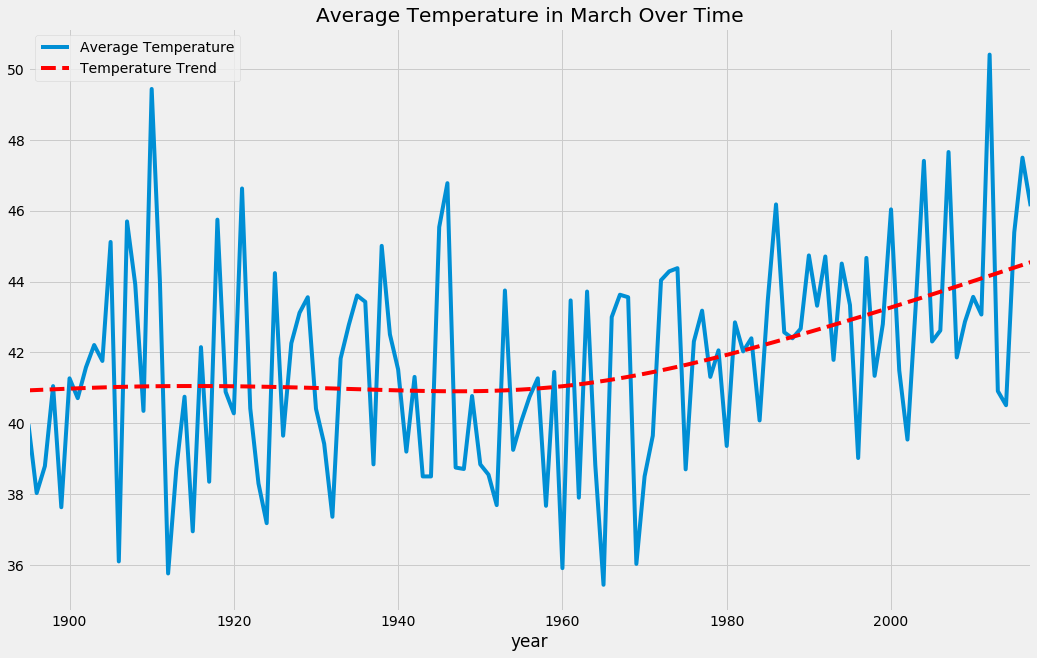

In [5]:
# Plot temperature trend
figure, ax = plt.subplots(figsize=(16,10))

df.plot('year', 'mar', title='Average Temperature in March Over Time', ax=ax, label='Average Temperature')

cycle, trend = sm.tsa.filters.hpfilter(df['mar'], lamb = 100000)
ax.plot(df['year'], trend, 'r--', label='Temperature Trend')
ax.legend()

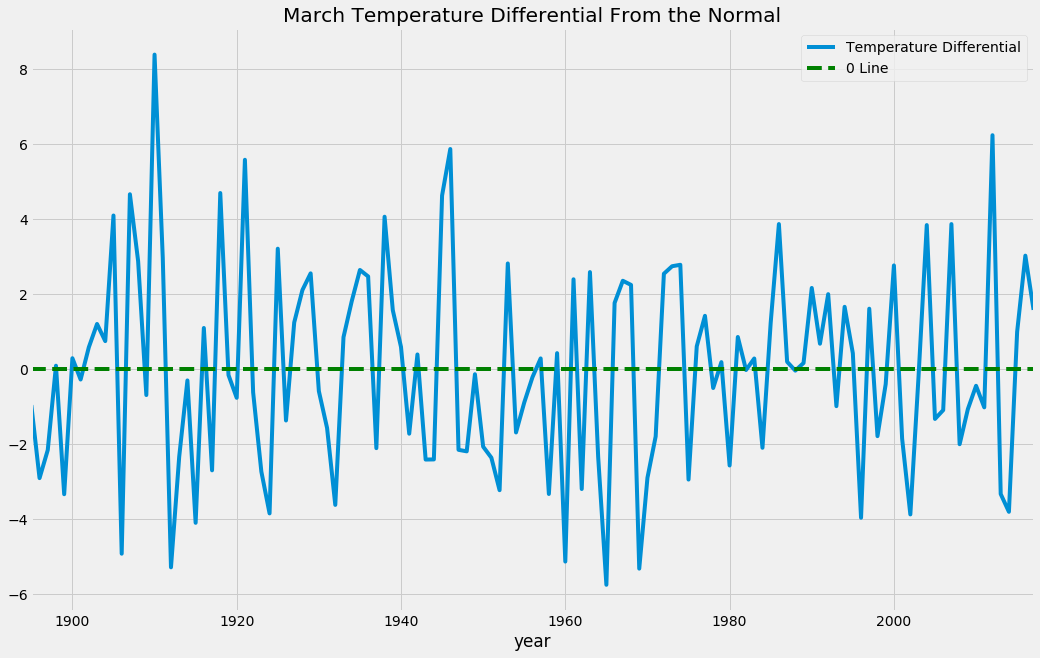

In [6]:
# Plot calculated offsets

figure, ax = plt.subplots(figsize=(16,10))

df.plot('year', 'mar_offset', title='March Temperature Differential From the Normal', ax=ax, label='Temperature Differential')
ax.plot(ax.get_xlim(), [0,0], 'g--', label='0 Line')
ax.legend()

In [7]:
# We only care about years where we have a result.
df.loc[df['result'] == 'Saw Shadow', 'result'] = '6 more weeks of winter'
df.loc[df['result'] == 'No Shadow', 'result'] = 'Early spring'
df = df[(df['result'] == '6 more weeks of winter') | (df['result'] == 'Early spring')]

df.head()

,year,result,feb,mar,apr,febmar,marapr,febmarapr,year_offset,feb_offset,...,mar_offset,mar_class,apr_offset,apr_class,febmar_offset,febmar_class,marapr_offset,marapr_class,febmarapr_offset,febmarapr_class
3,1898,6 more weeks of winter,35.37,41.05,50.79,38.21,45.92,42.40,4,3.937906,...,0.090714,2,-0.095872,1,2.014649,2,-0.003526,1,1.307493,2
5,1900,6 more weeks of winter,30.76,41.27,51.60,36.02,46.44,41.21,6,-0.809637,...,0.291656,2,0.717530,2,-0.253587,1,0.508706,2,0.066404,2
6,1901,6 more weeks of winter,29.86,40.71,49.39,35.28,45.05,39.99,7,-1.778410,...,-0.277529,1,-1.490995,1,-1.032533,1,-0.885119,1,-1.179101,1
7,1902,Early spring,31.46,41.58,50.85,36.52,46.22,41.30,8,-0.247164,...,0.583637,2,-0.029722,1,0.168705,2,0.281130,2,0.105450,2
8,1903,6 more weeks of winter,28.42,42.21,50.22,35.32,46.22,40.28,9,-3.355863,...,1.205247,2,-0.658677,1,-1.069808,1,0.277488,2,-0.939909,1


In [8]:
# Run OLS regression to see if Phil's predictions are ever statistically significant:

for i in ['feb', 'mar', 'apr', 'febmar', 'marapr', 'febmarapr']:
    # Run regression.  Note the call to `fit()` after the call to `ols`.
    mod = smf.ols(formula='%s_offset ~ C(result)' % i, data = df).fit()

    # Print the regression results if significant
    if mod.pvalues[1] <= .05:
        print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             apr_offset   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.778
Date:                Tue, 30 Jan 2018   Prob (F-statistic):             0.0104
Time:                        22:11:39   Log-Likelihood:                -228.96
No. Observations:                 117   AIC:                             461.9
Df Residuals:                     115   BIC:                             467.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

(1888, 2024)

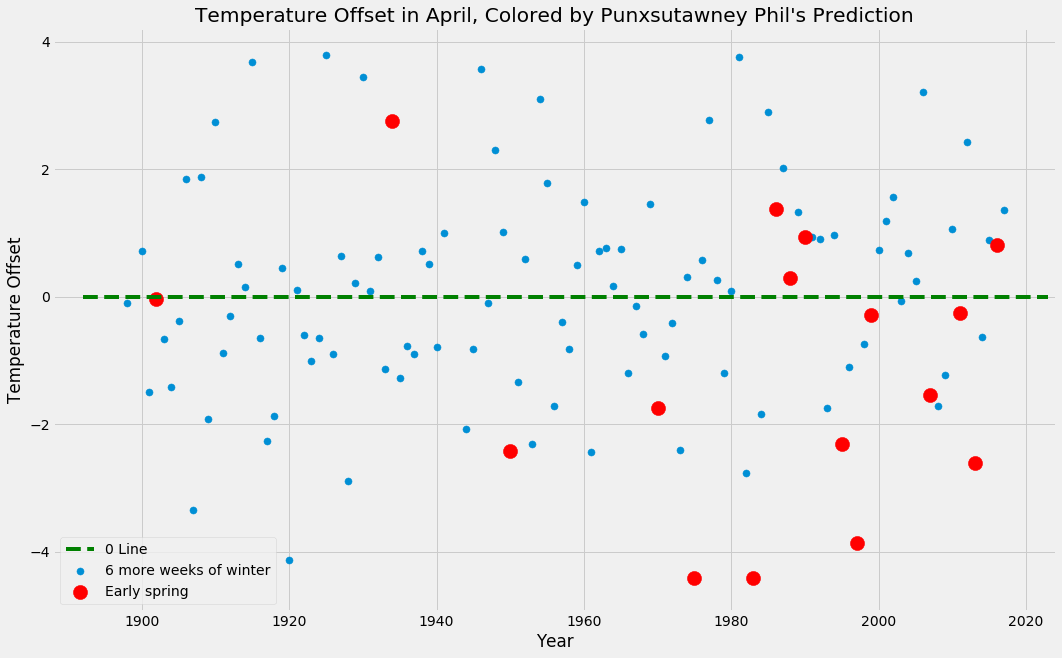

In [9]:
figure, ax = plt.subplots(figsize=(16,10))
ax.scatter(
    df['year'][df['result'] == '6 more weeks of winter'], 
    df['apr_offset'][df['result'] == '6 more weeks of winter'],
    label='6 more weeks of winter', s=50
)
ax.scatter(
    df['year'][df['result'] == 'Early spring'], 
    df['apr_offset'][df['result'] == 'Early spring'],
    label='Early spring', s=200, c='red'
)
ax.plot(ax.get_xlim(), [0,0], 'g--', label='0 Line')
ax.legend()
ax.set_title('Temperature Offset in April, Colored by Punxsutawney Phil\'s Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Offset')
ax.set_xlim([1888,2024])

(1888, 2024)

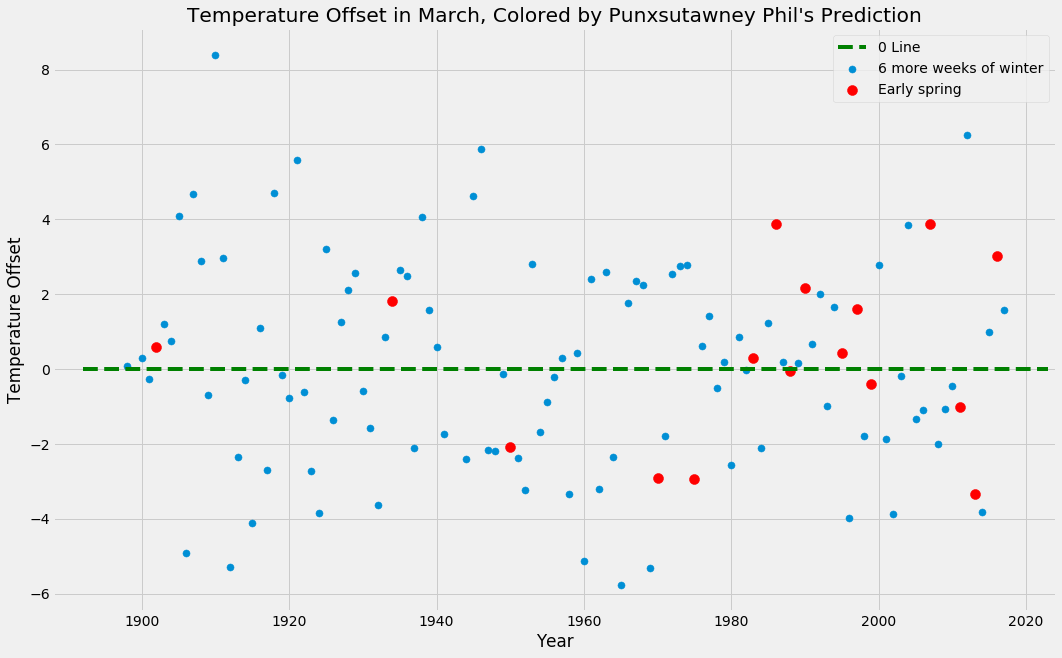

In [10]:
figure, ax = plt.subplots(figsize=(16,10))
ax.scatter(
    df['year'][df['result'] == '6 more weeks of winter'], 
    df['mar_offset'][df['result'] == '6 more weeks of winter'],
    label='6 more weeks of winter', s=50
)
ax.scatter(
    df['year'][df['result'] == 'Early spring'], 
    df['mar_offset'][df['result'] == 'Early spring'],
    label='Early spring', s=100, c='red'
)
ax.plot(ax.get_xlim(), [0,0], 'g--', label='0 Line')
ax.legend()
ax.set_title('Temperature Offset in March, Colored by Punxsutawney Phil\'s Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Offset')
ax.set_xlim([1888,2024])

In [11]:
# Load the predictions for the rest of the groudhogs and clean the data

d = pd.read_csv('2018-data/hogs.csv', sep='\t')
d['result'] = d['result'].str.extract('(.*)\[.*\]')
d['year'] = d['year'].astype(int)
d['name'] = d['name'].str.strip().str.replace(' ', '_')
d['name'] = d['name'].str.strip().str.replace('-', '_')
d = d[(d['result'] == '6 more weeks of winter') | (d['result'] == 'Early spring')]
names = d['name'].unique()
d.head()

c:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


,year,result,name,location
0,2017,6 more weeks of winter,Balzac_Billy,"Balzac, Alberta"
1,2017,6 more weeks of winter,Buckeye_Chuck,"Marion, Ohio"
2,2017,Early spring,Chattanooga_Chuck,"Chattanooga, Tennessee"
3,2017,Early spring,Chesapeake_Chuck,"Newport News, Virginia"
4,2017,Early spring,Chuckles,"Manchester, Connecticut"


In [12]:
# Convert it into a DataFrame having dummy variables for each of the differnt groudhogs

all_hogs = pd.get_dummies(d, columns=['name'], prefix='', prefix_sep='')

# Indicate early spring predictions with a 2.  6 more weeks of winter will be a 1.  0 means no prediction for that year
all_hogs.loc[all_hogs['result'] == 'Early spring', names] *= 2
all_hogs = all_hogs.groupby('year', as_index=False).sum()
all_hogs = df.merge(all_hogs, on='year')

all_hogs

,year,result,feb,mar,apr,febmar,marapr,febmarapr,year_offset,feb_offset,...,T_Boy_the_Nutria,Tumbleweed,Uni,Western_Maryland_Murray,Wiarton_Willie,Winnipeg_Willow,Winnipeg_Wyn,Woodstock_Willie,Woody,Wynter_the_Groundhog
0,2008,6 more weeks of winter,34.70,41.86,50.40,38.28,46.13,42.32,114,-0.849876,...,0,0,0,0,2,0,0,0,0,0
1,2009,6 more weeks of winter,36.77,42.87,50.92,39.82,46.90,43.52,115,1.182974,...,0,0,0,0,1,0,0,1,0,0
2,2010,6 more weeks of winter,31.80,43.57,53.24,37.68,48.40,42.87,116,-3.824424,...,0,0,2,0,1,0,0,2,0,0
3,2011,Early spring,33.04,43.07,51.96,38.06,47.52,42.69,117,-2.622104,...,2,2,1,1,2,0,0,0,1,0
4,2012,6 more weeks of winter,37.51,50.41,54.68,43.96,52.54,47.53,118,1.809943,...,2,0,1,1,2,0,0,2,2,2
5,2013,Early spring,34.77,40.91,49.68,37.84,45.30,41.79,119,-0.968253,...,2,0,0,1,2,2,0,0,2,0
6,2014,6 more weeks of winter,32.13,40.51,51.69,36.32,46.10,41.44,120,-3.646675,...,0,0,0,0,0,2,0,0,0,0
7,2015,6 more weeks of winter,32.99,45.39,53.24,39.19,49.32,43.87,121,-2.825300,...,2,0,1,1,2,2,0,1,1,0
8,2016,Early spring,39.47,47.50,53.19,43.48,50.34,46.72,122,3.615933,...,2,0,0,0,1,0,0,2,0,0
9,2017,6 more weeks of winter,41.18,46.13,53.78,43.66,49.96,47.03,123,5.287113,...,2,0,0,1,2,0,1,0,0,0


In [13]:
# Run OLS on all the differnt groudhogs individually

for hog in d.dropna()['name'].unique():
    for i in ['feb', 'mar', 'apr', 'febmar', 'marapr', 'febmarapr']:
        mod = smf.ols(formula='%s_offset ~ C(%s)' % (i, hog), data = all_hogs[all_hogs[hog] > 0]).fit()

        # Print the regression results
        if len(mod.pvalues) > 1 and mod.pvalues[1] <= .05:
            print(mod.summary())

c:\Users\Jeremy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
c:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
c:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
c:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
c:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot

                            OLS Regression Results                            
Dep. Variable:             feb_offset   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     14.08
Date:                Tue, 30 Jan 2018   Prob (F-statistic):            0.00560
Time:                        22:11:40   Log-Likelihood:                -20.062
No. Observations:                  10   AIC:                             44.12
Df Residuals:                       8   BIC:                             44.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.36

c:\Users\Jeremy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
c:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:             mar_offset   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     13.18
Date:                Tue, 30 Jan 2018   Prob (F-statistic):             0.0150
Time:                        22:11:40   Log-Likelihood:                -13.777
No. Observations:                   7   AIC:                             31.55
Df Residuals:                       5   BIC:                             31.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.72

c:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:             feb_offset   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     11.88
Date:                Tue, 30 Jan 2018   Prob (F-statistic):             0.0410
Time:                        22:11:40   Log-Likelihood:                -6.3960
No. Observations:                   5   AIC:                             16.79
Df Residuals:                       3   BIC:                             16.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5156 

In [14]:
# Try a machine learning algorithm using all the predictions together.


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

for m in ['feb', 'mar', 'apr', 'febmar', 'marapr', 'febmarapr']:
    results = []

    for i in range(1000):
        train_x, test_x, train_y, test_y = train_test_split(all_hogs[names], all_hogs['%s_class' % m], test_size=0.1)

        mod = SVC(kernel='poly', degree=3)
        mod.fit(train_x, train_y)
        results.append(mod.score(test_x, test_y))

    print(m)
    print('*'*20)
    print('prediction score:', np.array(results).mean())
    print('naive score:', max((all_hogs['%s_class' % m] == 1).sum() / 9, 1 - (all_hogs['%s_class' % m] == 1).sum() / 9))
    print('*'*20)

feb
********************
prediction score: 0.588
naive score: 0.666666666667
********************
mar
********************
prediction score: 0.705
naive score: 0.666666666667
********************
apr
********************
prediction score: 0.584
naive score: 0.555555555556
********************
febmar
********************
prediction score: 0.597
naive score: 0.666666666667
********************
marapr
********************
prediction score: 0.606
naive score: 0.555555555556
********************
febmarapr
********************
prediction score: 0.695
naive score: 0.777777777778
********************
